In [110]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


Reading the data into a DataFrame

In [111]:
daily = pd.read_csv('C:/Users/hp/Documents/Data Science/Bellbeat Case study/Data/dailyActivity_merged.csv')
Sheart = pd.read_csv('C:/Users/hp/Documents/Data Science/Bellbeat Case study/Data/heartrate_seconds_merged.csv')
Hcalories = pd.read_csv('C:/Users/hp/Documents/Data Science/Bellbeat Case study/Data/hourlyCalories_merged.csv')
Hintensity = pd.read_csv('C:/Users/hp/Documents/Data Science/Bellbeat Case study/Data/hourlySteps_merged.csv')
Mmet = pd.read_csv('C:/Users/hp/Documents/Data Science/Bellbeat Case study/Data/minuteMETsNarrow_merged.csv')
Msleep = pd.read_csv('C:/Users/hp/Documents/Data Science/Bellbeat Case study/Data/minuteSleep_merged.csv')
Dsleep = pd.read_csv('C:/Users/hp/Documents/Data Science/Bellbeat Case study/Data/sleepDay_merged.csv')
weight = pd.read_csv('C:/Users/hp/Documents/Data Science/Bellbeat Case study/Data/weightLogInfo_merged.csv')

# Data cleaning 
We will perforing data cleaning for checking and removing any redundent data or null values, fixing incorrect format if any, ensuring same category dataframes can have same or nearby number of values for important features like Id, Date etc for future cross analysis.

### Daily Activity


In [112]:
daily.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivityDistance,VeryActiveDistance,ModeatelyActiveDistance,LightActiveDistance,SedentaryActivityDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,04-12-2016,13162,8.5,0.0,1.9,0.6,6.1,0.0,25,13,328,728,1985
1,1503960366,4-13-2016,10735,7.0,0.0,1.6,0.7,4.7,0.0,21,19,217,776,1797
2,1503960366,4-14-2016,10460,6.7,0.0,2.4,0.4,3.9,0.0,30,11,181,1218,1776


In [113]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         940 non-null    int64  
 1   ActivityDate               940 non-null    object 
 2   TotalSteps                 940 non-null    int64  
 3   TotalDistance              940 non-null    float64
 4   LoggedActivityDistance     940 non-null    float64
 5   VeryActiveDistance         940 non-null    float64
 6   ModeatelyActiveDistance    940 non-null    float64
 7   LightActiveDistance        940 non-null    float64
 8   SedentaryActivityDistance  940 non-null    float64
 9   VeryActiveMinutes          940 non-null    int64  
 10  FairlyActiveMinutes        940 non-null    int64  
 11  LightlyActiveMinutes       940 non-null    int64  
 12  SedentaryMinutes           940 non-null    int64  
 13  Calories                   940 non-null    int64  

In [114]:
daily.duplicated().sum()

0

In [115]:
daily.isnull().sum()

Id                           0
ActivityDate                 0
TotalSteps                   0
TotalDistance                0
LoggedActivityDistance       0
VeryActiveDistance           0
ModeatelyActiveDistance      0
LightActiveDistance          0
SedentaryActivityDistance    0
VeryActiveMinutes            0
FairlyActiveMinutes          0
LightlyActiveMinutes         0
SedentaryMinutes             0
Calories                     0
dtype: int64

In [116]:
daily['ActivityDate'].nunique()

31

In [117]:
daily['Id'].nunique()

33

In [118]:
daily['ActivityDate'] = pd.to_datetime(daily['ActivityDate'])

daily['Month'] = daily['ActivityDate'].dt.month
daily['Day'] = daily['ActivityDate'].dt.day
daily = daily.drop(columns=['ActivityDate'])



In [119]:
daily.head(3)

,Id,TotalSteps,TotalDistance,LoggedActivityDistance,VeryActiveDistance,ModeatelyActiveDistance,LightActiveDistance,SedentaryActivityDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Month,Day
0,1503960366,13162,8.5,0.0,1.9,0.6,6.1,0.0,25,13,328,728,1985,4,12
1,1503960366,10735,7.0,0.0,1.6,0.7,4.7,0.0,21,19,217,776,1797,4,13
2,1503960366,10460,6.7,0.0,2.4,0.4,3.9,0.0,30,11,181,1218,1776,4,14


### Heart rate per second

In [ ]:
Sheart.head(5)

,Id,Date,Time,Value,Unnamed: 4
0,2022484408,04-12-2016,07:21:00,97,NaN
1,2022484408,04-12-2016,07:21:05,102,NaN
2,2022484408,04-12-2016,07:21:10,105,NaN
3,2022484408,04-12-2016,07:21:20,103,NaN
4,2022484408,04-12-2016,07:21:25,101,NaN


In [ ]:
Sheart.drop(columns='Unnamed: 4',inplace=True)

In [ ]:
Sheart.columns

Index(['Id', 'Date', 'Time', 'Value'], dtype='object')

In [ ]:
Sheart['Id'].nunique()

7

In [ ]:
Sheart['Id'].unique()

array([2022484408, 2026352035, 2347167796, 4020332650, 4388161847,
       4558609924, 5553957443], dtype=int64)

In [ ]:
Sheart['Date'].nunique()

31

In [ ]:
Sheart.duplicated().sum()

0

In [ ]:
Sheart.isnull().sum()

Id        0
Date      0
Time     11
Value     0
dtype: int64

In [ ]:
Sheart.dropna(subset=['Time'],inplace=True)

In [ ]:
Sheart.duplicated().sum()

0

In [ ]:
Sheart['Date'] = pd.to_datetime(Sheart['Date'])
Sheart['Month'] = Sheart['Date'].dt.month
Sheart['Day'] = Sheart['Date'].dt.day
Sheart = Sheart.drop(columns=['Date'])

In [ ]:
Sheart['Time'] = pd.to_datetime(Sheart['Time'], format='%H:%M:%S')

Sheart['Hour'] = Sheart['Time'].dt.hour
Sheart['Minute'] = Sheart['Time'].dt.minute
Sheart['Second'] = Sheart['Time'].dt.second
Sheart = Sheart.drop(columns=['Time'])

In [ ]:
Sheart.head(2)

,Id,Value,Month,Day,Hour,Minute,Second
0,2022484408,97,4,12,7,21,0
1,2022484408,102,4,12,7,21,5


### Calories burned per hour

In [ ]:
Hcalories.head(3)

,Id,Date,Time,Calories
0,1503960366,04-12-2016,00:00:00,81
1,1503960366,04-12-2016,01:00:00,61
2,1503960366,04-12-2016,02:00:00,59


In [ ]:
Hcalories['Id'].nunique()

33

In [ ]:
Hcalories.duplicated().sum()

0

In [ ]:
Hcalories.isnull().sum()

Id          0
Date        0
Time        0
Calories    0
dtype: int64

In [ ]:
Hcalories['Date'].nunique()

31

In [ ]:
Hcalories['Date'] = pd.to_datetime(Hcalories['Date'])
Hcalories['Month'] = Hcalories['Date'].dt.month
Hcalories['Day'] = Hcalories['Date'].dt.day
Hcalories = Hcalories.drop(columns=['Date'])

In [ ]:
Hcalories['Time'] = pd.to_datetime(Hcalories['Time'], format='%H:%M:%S')

Hcalories['Hour'] = Hcalories['Time'].dt.hour
Hcalories = Hcalories.drop(columns=['Time'])

In [ ]:
Hcalories.head(3)

,Id,Calories,Month,Day,Hour
0,1503960366,81,4,12,0
1,1503960366,61,4,12,1
2,1503960366,59,4,12,2


### Intensive activity each hour

In [ ]:
Hintensity.head(3)

,Id,ActivityHour,Time,StepTotal
0,1503960366,04-12-2016,00:00:00,373
1,1503960366,04-12-2016,01:00:00,160
2,1503960366,04-12-2016,02:00:00,151


In [ ]:
Hintensity.rename(columns={'ActivityHour':'Date'},inplace=True)

In [ ]:
Hintensity.head(3)

,Id,Date,Time,StepTotal
0,1503960366,04-12-2016,00:00:00,373
1,1503960366,04-12-2016,01:00:00,160
2,1503960366,04-12-2016,02:00:00,151


In [ ]:
Hintensity.duplicated().sum()

0

In [ ]:
Hintensity.isnull().sum()

Id           0
Date         0
Time         0
StepTotal    0
dtype: int64

In [ ]:
Hintensity["Id"].nunique()

33

In [ ]:
Hintensity['Date'] = pd.to_datetime(Hintensity['Date'])
Hintensity['Month'] = Hintensity['Date'].dt.month
Hintensity['Day'] = Hintensity['Date'].dt.day
Hintensity = Hintensity.drop(columns=['Date'])

In [ ]:
Hintensity['Time'] = pd.to_datetime(Hintensity['Time'], format='%H:%M:%S')

Hintensity['Hour'] = Hintensity['Time'].dt.hour
Hintensity = Hintensity.drop(columns=['Time'])

In [ ]:
Hintensity.head(3)

,Id,StepTotal,Month,Day,Hour
0,1503960366,373,4,12,0
1,1503960366,160,4,12,1
2,1503960366,151,4,12,2


### M E T


In [ ]:
Mmet.head(3)

,Id,Date,Time,METs
0,1503960366,04-12-2016,00:00:00,10
1,1503960366,04-12-2016,00:01:00,10
2,1503960366,04-12-2016,00:02:00,10


In [ ]:
Mmet.duplicated().sum()

0

In [ ]:
Mmet["Id"].nunique()

27

In [ ]:
Mmet.isnull().sum()

Id      0
Date    0
Time    0
METs    0
dtype: int64

In [ ]:
Mmet["Date"].nunique()

31

In [ ]:
Mmet['Date'] = pd.to_datetime(Mmet['Date'])
Mmet['Month'] = Mmet['Date'].dt.month
Mmet['Day'] = Mmet['Date'].dt.day
Mmet = Mmet.drop(columns=['Date'])

In [ ]:
Mmet['Time'] = pd.to_datetime(Mmet['Time'], format='%H:%M:%S')

Mmet['Hour'] = Mmet['Time'].dt.hour
Mmet['Minute'] = Mmet['Time'].dt.minute
Mmet = Mmet.drop(columns=['Time'])

In [ ]:
Mmet.head(3)

,Id,METs,Month,Day,Hour,Minute
0,1503960366,10,4,12,0,0
1,1503960366,10,4,12,0,1
2,1503960366,10,4,12,0,2


### Sleep per minute

In [ ]:
Msleep.head(3)

,Id,date,Time,value
0,1503960366,04-12-2016,02:47,3
1,1503960366,04-12-2016,02:48,2
2,1503960366,04-12-2016,02:49,1


In [ ]:
Msleep.duplicated().sum()

543

In [ ]:
Msleep.rename(columns={'date':'Date'},inplace= True)

In [ ]:
Msleep.drop_duplicates(subset=['Id','Date','Time'],keep='first',inplace=True) #kept the first occurence and removed the rest. Also checking only ID,Date and Time for unique occurence.

In [ ]:
Msleep.isnull().sum()

Id       0
Date     0
Time     0
value    0
dtype: int64

In [ ]:
Msleep['Date'].nunique()

32

In [ ]:
Msleep['Date'] = pd.to_datetime(Msleep['Date'])
Msleep['Month'] = Msleep['Date'].dt.month
Msleep['Day'] = Msleep['Date'].dt.day
Msleep = Msleep.drop(columns=['Date'])

In [ ]:
Msleep['Time'] = pd.to_datetime(Msleep['Time'], format='%H:%M')

Msleep['Hour'] = Msleep['Time'].dt.hour
Msleep['Minute'] = Msleep['Time'].dt.minute
Msleep = Msleep.drop(columns=['Time'])

### Sleep per Day


In [ ]:
Dsleep.head(3)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,04-12-2016,1,327,346
1,1503960366,4-13-2016,2,384,407
2,1503960366,4-15-2016,1,412,442


In [ ]:
Dsleep.duplicated().sum()

3

In [ ]:
Dsleep.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [ ]:
Dsleep.rename(columns={'SleepDay':'Date'},inplace=True)

In [ ]:
Dsleep.drop_duplicates(subset=['Id','Date'],keep='first',inplace=True)

In [ ]:
Dsleep['Date'].nunique()

31

In [ ]:
Dsleep['Id'].nunique()


24

In [ ]:
Dsleep['Date'] = pd.to_datetime(Dsleep['Date'])
Dsleep['Month'] = Dsleep['Date'].dt.month
Dsleep['Day'] = Dsleep['Date'].dt.day
Dsleep = Dsleep.drop(columns=['Date'])

In [ ]:
Dsleep.head(3)

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Month,Day
0,1503960366,1,327,346,4,12
1,1503960366,2,384,407,4,13
2,1503960366,1,412,442,4,15


### Weight per day

In [ ]:
weight.head(3)

,Id,Date,Time,WeightKg,WeightPounds,Fat,BMI,IsManualReport
0,1.503960e+09,05-02-2016,23:59:00,52.6,116.0,22.0,22.6,True
1,1.503960e+09,05-03-2016,23:59:00,52.6,116.0,NaN,22.6,True
2,1.927972e+09,4-13-2016,01:08:52,133.5,294.3,NaN,47.5,False


In [ ]:
weight.isnull().sum()

Id                 1
Date               1
Time               0
WeightKg           1
WeightPounds       1
Fat               66
BMI                0
IsManualReport     1
dtype: int64

In [ ]:
weight.drop(columns=['WeightPounds','Fat','Time'],inplace=True)

In [ ]:
weight = weight.dropna()

In [ ]:
weight['Id'] = weight['Id'].astype(str).str.strip()
weight['Id'] = pd.to_numeric(weight['Id'], errors='coerce')
weight['Id'] = weight['Id'].astype('int64')       




In [ ]:
weight['Date'].nunique()

31

In [ ]:
weight['Id'].nunique()

8

In [ ]:
weight.duplicated().sum()

0

In [ ]:
weight.drop_duplicates(subset=['Id','Date'],keep='first',inplace=True)

In [ ]:
weight['Date'] = pd.to_datetime(weight['Date'])
weight['Month'] = weight['Date'].dt.month
weight['Day'] = weight['Date'].dt.day
weight = weight.drop(columns=['Date'])

In [ ]:
weight.head(3)

,Id,WeightKg,BMI,IsManualReport,Month,Day
0,1503960366,52.6,22.6,True,5,2
1,1503960366,52.6,22.6,True,5,3
2,1927972279,133.5,47.5,False,4,13


# EDA
split into Unimodal and mulitmodal analysis

### Unimodal Analysis

##### DailyActivity

In [ ]:
desc = daily[['TotalDistance','LoggedActivityDistance','VeryActiveDistance','ModeatelyActiveDistance','LightActiveDistance','SedentaryActivityDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']].describe()
print(desc)


       TotalDistance  LoggedActivityDistance  VeryActiveDistance  \
count     940.000000              940.000000          940.000000   
mean        5.492979                0.108723            1.504149   
std         3.924752                0.622038            2.658499   
min         0.000000                0.000000            0.000000   
25%         2.600000                0.000000            0.000000   
50%         5.250000                0.000000            0.200000   
75%         7.700000                0.000000            2.025000   
max        28.000000                4.900000           21.900000   

       ModeatelyActiveDistance  LightActiveDistance  \
count               940.000000           940.000000   
mean                  0.567979             3.343191   
std                   0.882432             2.041061   
min                   0.000000             0.000000   
25%                   0.000000             1.975000   
50%                   0.200000             3.400000   
75

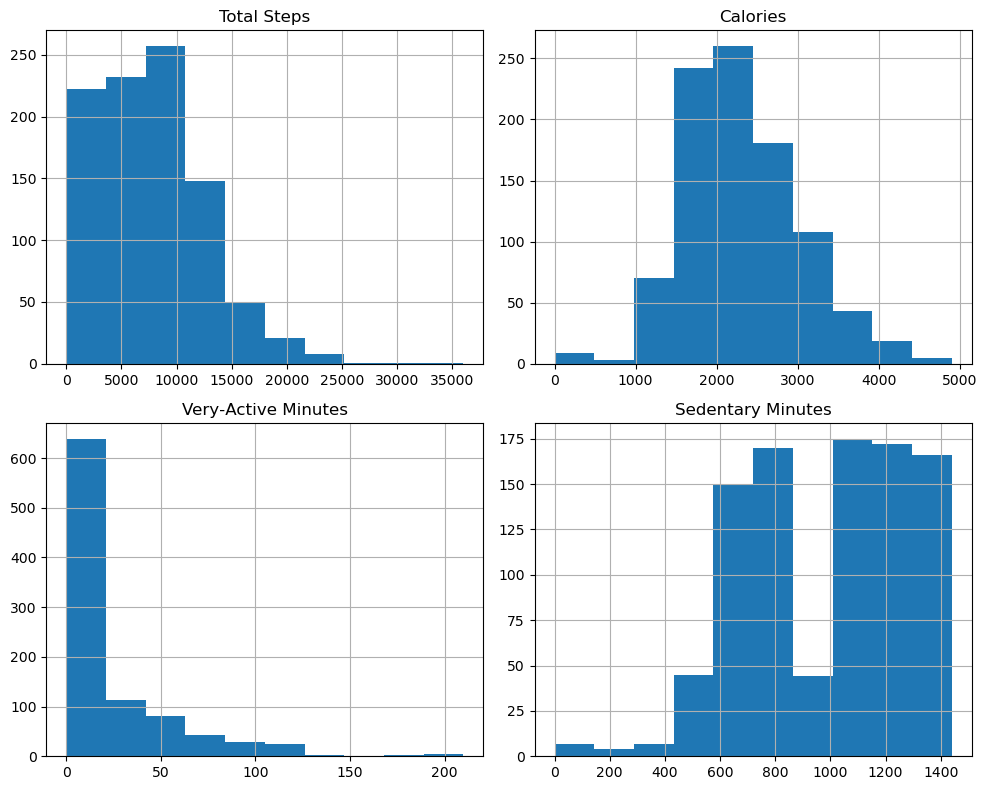

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
daily['TotalSteps'].hist(ax=axes[0,0]); axes[0,0].set_title('Total Steps')
daily['Calories'].hist(ax=axes[0,1]);   axes[0,1].set_title('Calories')
daily['VeryActiveMinutes'].hist(ax=axes[1,0]); axes[1,0].set_title('Very‑Active Minutes')
daily['SedentaryMinutes'].hist(ax=axes[1,1]);  axes[1,1].set_title('Sedentary Minutes')
plt.tight_layout()


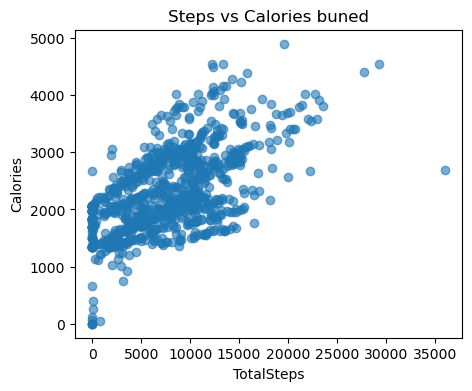

0.5915680862453354

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(daily['TotalSteps'],daily['Calories'],alpha = 0.6)
plt.xlabel('TotalSteps')
plt.ylabel('Calories')
plt.title('Steps vs Calories buned')
plt.show()
daily[['TotalSteps', 'Calories']].corr().iloc[0,1]


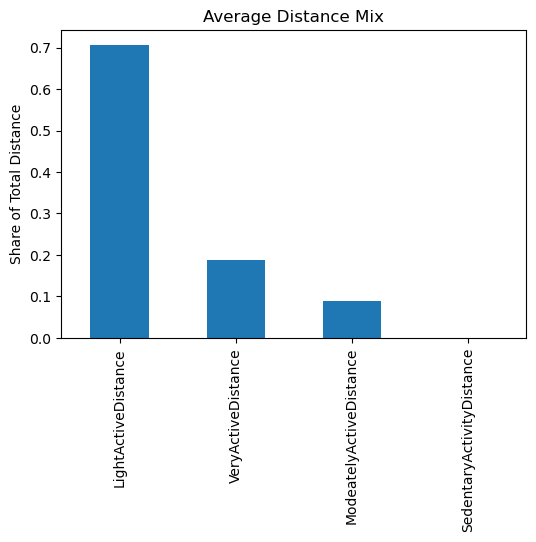

In [ ]:
dist_cols = ['VeryActiveDistance', 'ModeatelyActiveDistance',
             'LightActiveDistance', 'SedentaryActivityDistance']
dist_pct = daily[dist_cols].div(daily['TotalDistance'], axis=0).mean().sort_values(ascending=False)

dist_pct.plot(kind='bar', figsize=(6,4), title='Average Distance Mix')
plt.ylabel('Share of Total Distance')
plt.show()


In [ ]:

# Create a proper date column (assuming the year is 2016, as in the original Fitbit dataset)
daily['Date'] = pd.to_datetime({'year': 2016, 'month': daily['Month'], 'day': daily['Day']})
# Extract the day of the week (0 = Monday, 6 = Sunday)
daily['DayOfWeek'] = daily['Date'].dt.dayofweek
# Label weekday vs weekend
daily['DayType'] = daily['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
daily[['Date', 'DayOfWeek', 'DayType']].head()



,Date,DayOfWeek,DayType
0,2016-04-12,1,Weekday
1,2016-04-13,2,Weekday
2,2016-04-14,3,Weekday
3,2016-04-15,4,Weekday
4,2016-04-16,5,Weekend


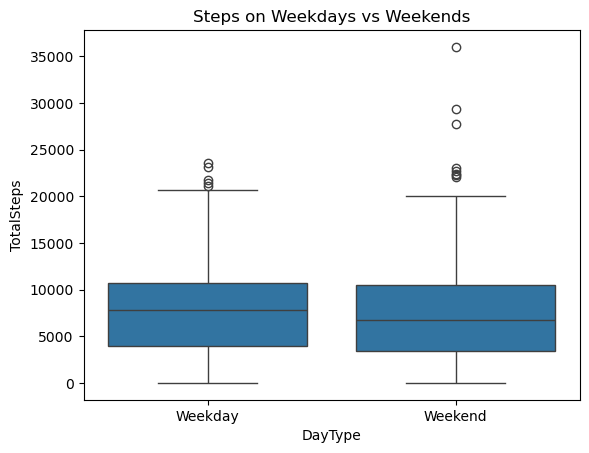

In [ ]:
sns.boxplot(x='DayType', y='TotalSteps', data=daily)
plt.title('Steps on Weekdays vs Weekends')
plt.show()

In [ ]:
daily.groupby('DayType')['TotalSteps'].mean()
daily.groupby('DayType')['Calories'].mean()


DayType
Weekday    2301.516547
Weekend    2309.546939
Name: Calories, dtype: float64

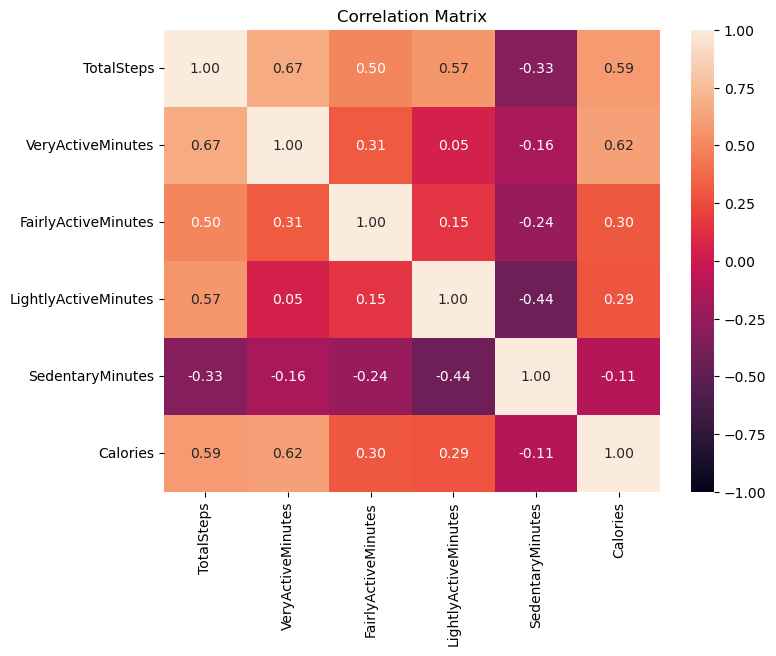

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(daily[['TotalSteps','VeryActiveMinutes','FairlyActiveMinutes',
                   'LightlyActiveMinutes','SedentaryMinutes','Calories']].corr(),
            annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


##### Hourly calories

In [ ]:
Hcalories.head(2)

,Id,Calories,Month,Day,Hour
0,1503960366,81,4,12,0
1,1503960366,61,4,12,1


In [ ]:
Hcalories[['Calories','Month','Day','Hour']].describe()

,Calories,Month,Day,Hour
count,22099.000000,22099.000000,22099.000000,22099.000000
mean,97.386760,4.338748,15.852663,11.415765
std,60.702622,0.473295,8.567610,6.915140
min,42.000000,4.000000,1.000000,0.000000
25%,63.000000,4.000000,9.000000,5.000000
50%,83.000000,4.000000,16.000000,11.000000
75%,108.000000,5.000000,23.000000,17.000000
max,948.000000,5.000000,30.000000,23.000000


<Axes: xlabel='Hour'>

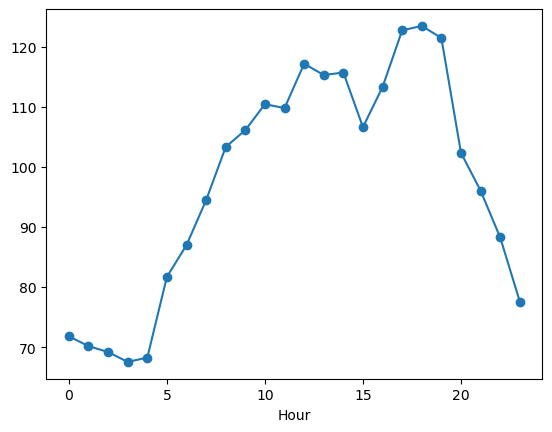

In [ ]:
Hcalories.groupby('Hour')['Calories'].mean().plot(kind='line', marker='o')

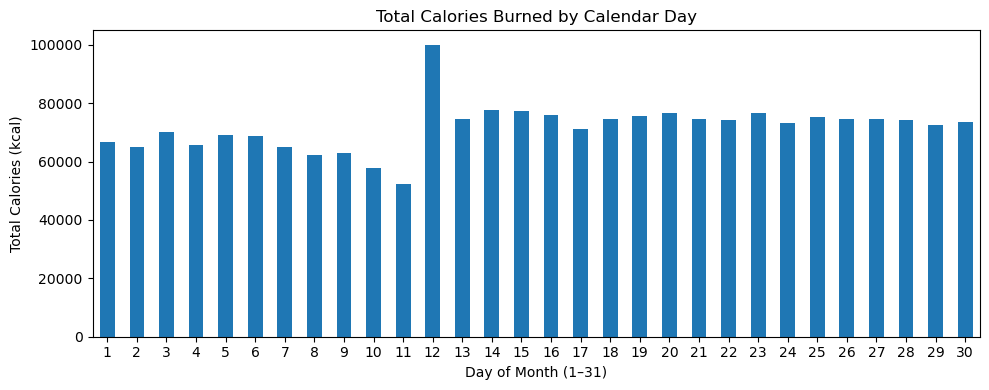

In [ ]:

Hcalories['Datetime'] = pd.to_datetime(
    {'year': 2016,
     'month': Hcalories['Month'],
     'day':   Hcalories['Day'],
     'hour':  Hcalories['Hour']}
)

day_totals = (
    Hcalories
      .groupby('Day')['Calories']        
      .sum()                             
      .sort_index()
)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
day_totals.plot(kind='bar')             
plt.title('Total Calories Burned by Calendar Day')
plt.xlabel('Day of Month (1–31)')
plt.ylabel('Total Calories (kcal)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### Intensive Hour

In [ ]:
Hintensity.head()

,Id,StepTotal,Month,Day,Hour
0,1503960366,373,4,12,0
1,1503960366,160,4,12,1
2,1503960366,151,4,12,2
3,1503960366,0,4,12,3
4,1503960366,0,4,12,4


In [ ]:
Hintensity.head(3)

,Id,StepTotal,Month,Day,Hour
0,1503960366,373,4,12,0
1,1503960366,160,4,12,1
2,1503960366,151,4,12,2


In [ ]:
# Average steps for each clock hour (0‑23)
hourly_pattern = (
    Hintensity.groupby('Hour')['StepTotal']
              .mean()
              .reset_index()
)

# How peaky is it?
peak_to_valley = hourly_pattern['StepTotal'].max() / hourly_pattern['StepTotal'].min()
print(f"Peak-to‑valley ratio: {peak_to_valley:.1f}×")


Peak-to‑valley ratio: 93.2×


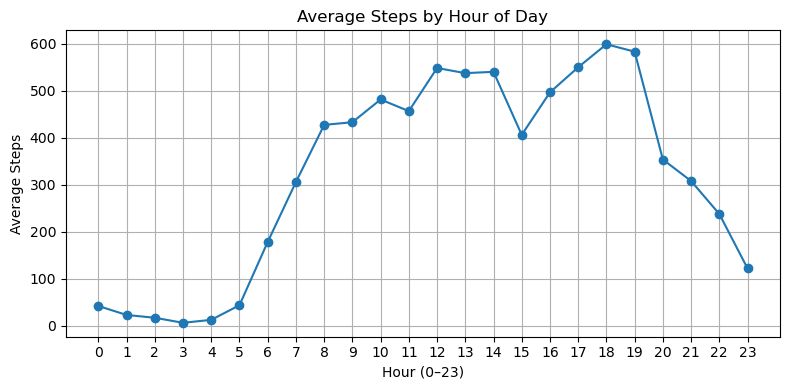

In [ ]:
import matplotlib.pyplot as plt

hourly_pattern = (
    Hintensity.groupby('Hour')['StepTotal']
              .mean()
              .reset_index()
)

plt.figure(figsize=(8, 4))
plt.plot(hourly_pattern['Hour'], hourly_pattern['StepTotal'], marker='o')
plt.title('Average Steps by Hour of Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Average Steps')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


##### METs

Metabolic Equivalent of Task. A unit that expresses how much energy an activity uses relative to resting. 1 MET ≈ the energy you burn at rest.


In [ ]:
Mmet.head(3)

,Id,METs,Month,Day,Hour,Minute
0,1503960366,10,4,12,0,0
1,1503960366,10,4,12,0,1
2,1503960366,10,4,12,0,2


In [ ]:
Mmet['METs'].unique()

array([ 10,  12,  26,  32,  36,  30,  28,  34,  24,  76,  85,  97,  99,
        90,  40,  66,  78,  58,  42,  56,  64,  50,  52,  38,  54,  44,
        62,  48,  81,  60,  72,  89,  80,  74,  91,  79,  68,  70,  83,
        88, 107, 111,  86,  93,  82,  92,  95,  87,  84, 103, 101,  96,
       109,  98, 105, 100,  46,  59,  55,  61,  73,  77,  75,  65,  57,
       104, 102,   0,  67,  69,  63,  71,  20,  18,  16,  22,  14,  15,
         6,  11,  13,  45,  53,  39,  33,  41,  37,  94, 120, 126, 106,
        43,  31, 113, 115, 117,  35, 114,  47,  49, 146, 144, 140, 138,
       132, 130, 128, 124, 122, 110, 136, 121, 119, 108,  51, 112,  29,
        27, 149, 157, 153, 123, 127, 135, 131, 129, 125, 137, 133, 118,
       116, 141, 134,  21], dtype=int64)

In [ ]:
Mmet['MET'] = Mmet['METs'] / 10
Mmet.drop(columns='METs', inplace=True)



In [ ]:
Mmet['Datetime'] = pd.to_datetime({
    'year':   2016,
    'month':  Mmet['Month'],
    'day':    Mmet['Day'],
    'hour':   Mmet['Hour'],
    'minute': Mmet['Minute']
})
Mmet.set_index('Datetime', inplace=True)

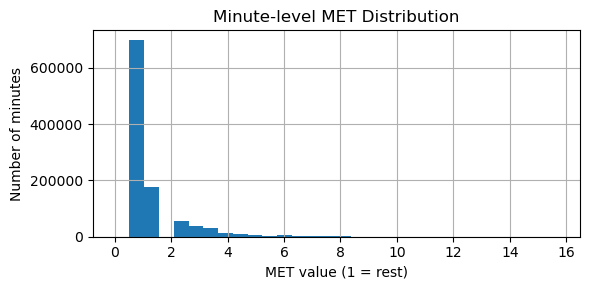

In [ ]:
plt.figure(figsize=(6,3))
Mmet['MET'].hist(bins=30)
plt.title('Minute‑level MET Distribution')
plt.xlabel('MET value (1 = rest)')
plt.ylabel('Number of minutes')
plt.tight_layout(); plt.show()


In [ ]:
# 1 minute at X METs = X MET‑minutes
weekly_metmin = (
    Mmet.groupby(['Id', Mmet.index.isocalendar().week])['MET']
        .sum()
        .reset_index(name='MET_min')
)
share_meeting = (weekly_metmin['MET_min'] >= 500).mean() * 100
print(f"{share_meeting:.1f}% of user‑weeks meet the 500 MET‑min guideline")


100.0% of user‑weeks meet the 500 MET‑min guideline


##### sleep per minute
we wont be taking this as its not relevent for this analysis

##### Sleep per day

In [ ]:
Dsleep.head(2)

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Month,Day
0,1503960366,1,327,346,4,12
1,1503960366,2,384,407,4,13


In [ ]:
Dsleep['Date'] = pd.to_datetime({'year': 2016,
                                  'month': Dsleep['Month'],
                                  'day': Dsleep['Day']})

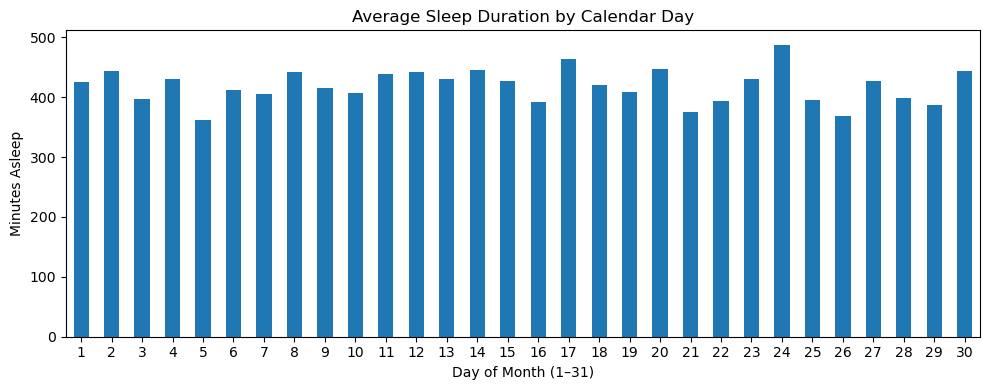

In [ ]:
plt.figure(figsize=(10, 4))
Dsleep.groupby('Day')['TotalMinutesAsleep'].mean().plot(kind='bar')
plt.title('Average Sleep Duration by Calendar Day')
plt.xlabel('Day of Month (1–31)')
plt.ylabel('Minutes Asleep')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

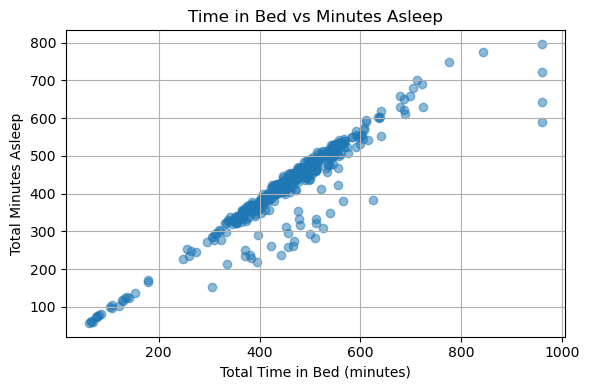

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(Dsleep['TotalTimeInBed'], Dsleep['TotalMinutesAsleep'], alpha=0.5)
plt.title('Time in Bed vs Minutes Asleep')
plt.xlabel('Total Time in Bed (minutes)')
plt.ylabel('Total Minutes Asleep')
plt.grid(True)
plt.tight_layout()
plt.show()


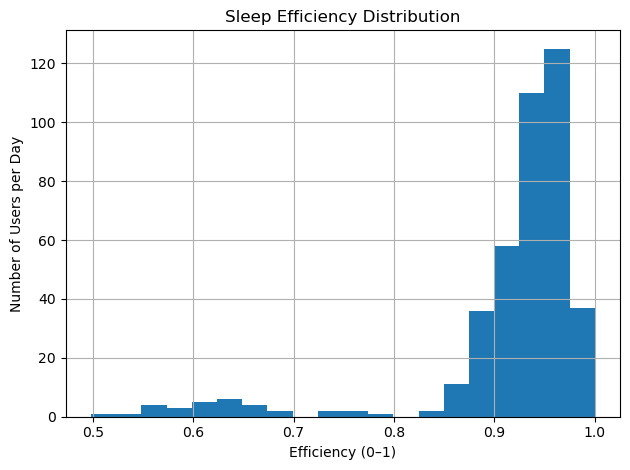

In [ ]:
Dsleep['SleepEfficiency'] = Dsleep['TotalMinutesAsleep'] / Dsleep['TotalTimeInBed']
Dsleep['SleepEfficiency'].hist(bins=20)
plt.title('Sleep Efficiency Distribution')
plt.xlabel('Efficiency (0–1)')
plt.ylabel('Number of Users per Day')
plt.tight_layout(); plt.show()



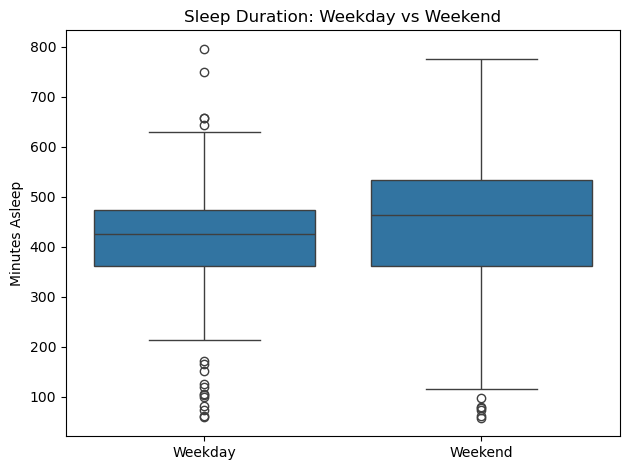

In [ ]:
# Extract day of week
Dsleep['DayOfWeek'] = Dsleep['Date'].dt.dayofweek
Dsleep['DayType'] = Dsleep['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Plot
import seaborn as sns

sns.boxplot(x='DayType', y='TotalMinutesAsleep', data=Dsleep)
plt.title('Sleep Duration: Weekday vs Weekend')
plt.xlabel('')
plt.ylabel('Minutes Asleep')
plt.tight_layout(); plt.show()


##### weight
we dont need for analysis

### Multimodal Analysis

1) Do nights with ≥ 7 h of sleep lead to fewer sedentary minutes the next day?

Daily x sleep per day

C:\Users\hp\AppData\Local\Temp\ipykernel_9540\165274923.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Over7hSleep', y='SedentaryMinutes', data=merged,


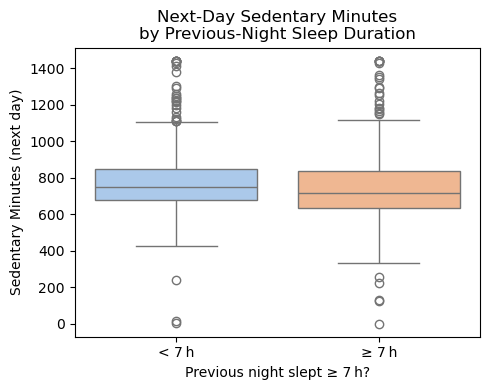

Average reduction in sedentary time after ≥7 h sleep: 43 minutes


In [ ]:

# 1.  Build proper Date columns in both tables
daily  ['Date'] = pd.to_datetime({'year': 2016,
                                  'month': daily ['Month'],
                                  'day':   daily ['Day']})

Dsleep['Date'] = pd.to_datetime({'year': 2016,
                                  'month': Dsleep['Month'],
                                  'day':   Dsleep['Day']})

# 2.  Shift sleep forward by 1 day so it matches
#     TOMORROW's activity (next‑day effect)
Dsleep_shift = Dsleep.copy()
Dsleep_shift['Date'] = Dsleep_shift['Date'] + pd.Timedelta(days=1)

# 3.  Merge → one row per user‑day with last‑night sleep
merged = pd.merge(daily,
                  Dsleep_shift[['Id','Date','TotalMinutesAsleep']],
                  on=['Id','Date'],
                  how='inner')

# 4.  Flag nights with ≥ 7 h sleep  (420 min)
merged['Over7hSleep'] = merged['TotalMinutesAsleep'] >= 420

# 5.  Box‑plot of next‑day Sedentary Minutes

plt.figure(figsize=(5,4))
sns.boxplot(x='Over7hSleep', y='SedentaryMinutes', data=merged,
            palette='pastel')
plt.title('Next‑Day Sedentary Minutes\nby Previous‑Night Sleep Duration')
plt.xlabel('Previous night slept ≥ 7 h?')
plt.ylabel('Sedentary Minutes (next day)')
plt.xticks([0,1], ['< 7 h','≥ 7 h'])
plt.tight_layout(); plt.show()

# 6.  Print mean difference for your slide caption
means = merged.groupby('Over7hSleep')['SedentaryMinutes'].mean()
diff  = means.loc[False] - means.loc[True]
print(f"Average reduction in sedentary time after ≥7 h sleep: {diff:.0f} minutes")


2) daily x dsleep

“Weekend catch‑up effect”
(Do users who sleep poorly on weekdays work out harder on weekends?)

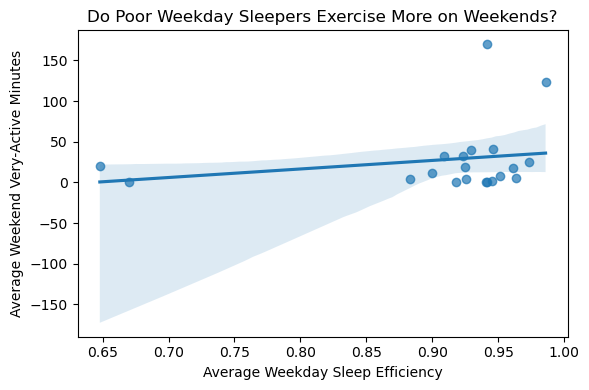

Correlation (weekday sleep efficiency  vs weekend VAMin): 0.22


In [ ]:

# -------------------------------------------------
# 1. Build Date columns
# -------------------------------------------------
daily  ['Date'] = pd.to_datetime({'year': 2016,
                                  'month': daily ['Month'],
                                  'day':   daily ['Day']})

Dsleep['Date'] = pd.to_datetime({'year': 2016,
                                  'month': Dsleep['Month'],
                                  'day':   Dsleep['Day']})

# -------------------------------------------------
# 2. Label each row as Weekday (Mon‑Fri) or Weekend (Sat‑Sun)
# -------------------------------------------------
daily ['DayType'] = daily ['Date'].dt.dayofweek.apply(lambda d: 'Weekend' if d >= 5 else 'Weekday')
Dsleep['DayType'] = Dsleep['Date'].dt.dayofweek.apply(lambda d: 'Weekend' if d >= 5 else 'Weekday')

# -------------------------------------------------
# 3. Merge daily activity and sleep on the same night
#    (no shift needed—we want weekday sleep WITH weekday activity)
# -------------------------------------------------
merged = pd.merge(daily,
                  Dsleep[['Id','Date','SleepEfficiency','DayType']],
                  on=['Id','Date','DayType'],
                  how='inner')

# -------------------------------------------------
# 4. User‑level averages:
#    • mean weekday sleep efficiency
#    • mean weekend very‑active minutes
# -------------------------------------------------
pivot = (merged
         .pivot_table(index='Id',
                      columns='DayType',
                      values=['SleepEfficiency','VeryActiveMinutes'],
                      aggfunc='mean'))

pivot.columns = ['SleepEff_weekday',
                 'SleepEff_weekend',
                 'VAMin_weekday',
                 'VAMin_weekend']
pivot = pivot.reset_index()

# -------------------------------------------------
# 5. Scatter plot: weekday sleep efficiency vs weekend very‑active minutes
# -------------------------------------------------
plt.figure(figsize=(6,4))
sns.regplot(x='SleepEff_weekday',
            y='VAMin_weekend',
            data=pivot,
            scatter_kws={'alpha':0.7})
plt.title('Do Poor Weekday Sleepers Exercise More on Weekends?')
plt.xlabel('Average Weekday Sleep Efficiency')
plt.ylabel('Average Weekend Very‑Active Minutes')
plt.tight_layout(); plt.show()

# -------------------------------------------------
# 6. Correlation value for your slide caption
# -------------------------------------------------
corr = pivot[['SleepEff_weekday','VAMin_weekend']].corr().iloc[0,1]
print(f"Correlation (weekday sleep efficiency  vs weekend VAMin): {corr:.2f}")


3) Hintensity x Hcalories

Do higher‑intensity hours (more steps) burn more calories?

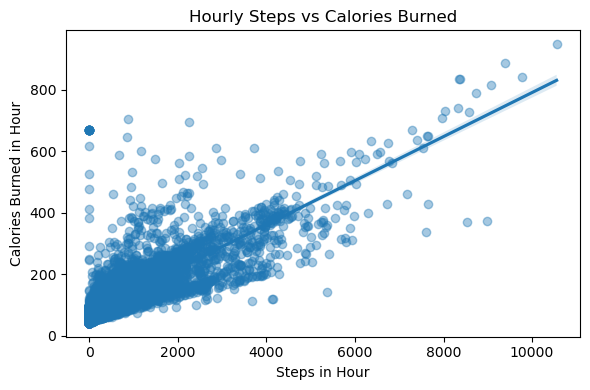

Correlation between hourly steps and calories: 0.81


In [ ]:

# 1.  Build a matching hourly timestamp in BOTH tables
Hcalories['Datetime'] = pd.to_datetime({'year': 2016,
                                        'month': Hcalories['Month'],
                                        'day':   Hcalories['Day'],
                                        'hour':  Hcalories['Hour']})

Hintensity['Datetime'] = pd.to_datetime({'year': 2016,
                                         'month': Hintensity['Month'],
                                         'day':   Hintensity['Day'],
                                         'hour':  Hintensity['Hour']})

# 2.  Optional: aggregate in case multiple entries per hour
cal_hour = (Hcalories.groupby(['Id','Datetime'])['Calories']
                      .sum()
                      .reset_index())

steps_hour = (Hintensity.groupby(['Id','Datetime'])['StepTotal']
                        .sum()
                        .reset_index())

# 3.  Merge on identical Id + Datetime
hourly = pd.merge(cal_hour, steps_hour,
                  on=['Id','Datetime'], how='inner')

# 4.  Scatter and regression line

plt.figure(figsize=(6,4))
sns.regplot(x='StepTotal', y='Calories',
            data=hourly, scatter_kws={'alpha':0.4})
plt.title('Hourly Steps vs Calories Burned')
plt.xlabel('Steps in Hour')
plt.ylabel('Calories Burned in Hour')
plt.tight_layout(); plt.show()

# 5.  Correlation coefficient for your report
corr = hourly[['StepTotal','Calories']].corr().iloc[0,1]
print(f"Correlation between hourly steps and calories: {corr:.2f}")
